# Regressão Logística


## Tópicos

## Resumo

Regressão Logística normalmente resolve problemas de classificação.

Regressão lienar não ajusta uma linha boa para problemas de classificação. 

 Exemplos de classificação:
- Span vs 'Ham' (email)
- Diagnóstico de doenças

Quando vemos a regressão linear nós estamos preditando variáveis contínuas mas a regressão logística predita variáveis categóricas (categoria discreta)



### Aprendendo sobre regressão logística

Quero inferir dados que não são numéricos, são variáveis categóricas. Ex: compra ou não compra um iphone baseado no salário.

 - Como eu faria uma regressão nesse caso?
 R. Olhando para a frequência .(probabilidae)

Não podemos usar um modelo de regressão linear em grupos binários não vai leva-lo a um bom ajuste. Só a regressão não se ajustaria bem na fronteira de decisão por isso para resolver o problema é aplicado uma função logístíca na regressão.

A função aplicada é a função sigmoide. essa é uma função matemática, o nome vem da forma de 'S' do seu gráfico. A sigmoide pode ser tratada como uma função que liga e desliga (função de ativação), existem outras funções de ativação além do sigmóide.

<img src='sigmoide_function.png' />

### Quando usar regressão logístíca

1) Se seu dados é binário (categórico de 2 classes). ex? 0/1, yes/no, true/false.
2) Se você precisa de resultados probabilísticos. Ex: Probabilidade de um cliente comprar um produto
3) Quando você precisa de um fronteira de decisão (linear, polinomial)
4) Se você precisa entender o impacto da feature na predição.


### Comparando a regressão linear com a logística
 

<table border='1'>
   <tr>
       <td> - </td>
       <td>Linear</td>
       <td>Logística </td>
    </tr> 
    <tr>
        <td>Reta</td>
        <td>Reta</td>
        <td>Curva-</td>
    </tr>
     <tr>
        <td>Variável Dependente</td>
        <td>caontínua</td>
        <td>categórica</td>
    </tr>
     <tr>
        <td>Interpretação</td>
        <td> y</td>
        <td>$ln(\frac{p}{1 + p}$</td>
    </tr>
</table>

obs*: As duas regressões usar várias métodos para atualizar theta. Um dos mais importantes é o gradiente e descendente.

Um das métricas para a regressão logística é a matrix confusa

<img src='confusion_matrix_simple.png' />

Acurácia: no geral, com que frequência está correto?
(TP + TN) / total - 150/165 = 0.91 ou 91%

taxa de não classificação
(Taxa de Erro)
Em relação ao total quantos foram preditados corretamente?
(FP + FN) / total = 15/165 = 0.09

Type I Error (false positive)(falso positivo)

<img src='false_positive_1.jpg' />

TYpe II Error (false negative)(falso negativo)

<img src='false_negative_1.jpg'/>

Uma outra forma de olhar para a matrix confusa é:

<img  src="matrix_confusa_engracado.png"/>



pesquisar e olhar nos flashcards sobre log loss e como essa métrica é importante para modelos de regressão logística.


Vamos entender um pouco sobre Log Loss ou Binary cross entropy.

Bem, sabemos que uma regressão logística usa uma função sigmode para transformar os dados, porque se usásssemos apenas uma regressão, seria construído uma linha, e ela não se ajustaria adequadamente a um problema de regressão onde há uma variável categórica. 

Vamos ver isso um pouco mais afundo:

Imagine que você tem 10 pontos aleatórios e precisa classifica-los se esses pontos são vermelhos ou verdes.

x = [-2.2, -1.4, -0.8, 0.2, 0.4, 0.8, 1.2, 2.2, 2.9, 4.6]



referência:

https://medium.com/ensina-ai/uma-explica%C3%A7%C3%A3o-visual-para-fun%C3%A7%C3%A3o-de-custo-binary-cross-entropy-ou-log-loss-eaee662c396c



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
x = [-2.2, -1.4, -0.8, 0.2, 0.4, 0.8, 1.2, 2.2, 2.9, 4.6]

Y = np.zeros(10)

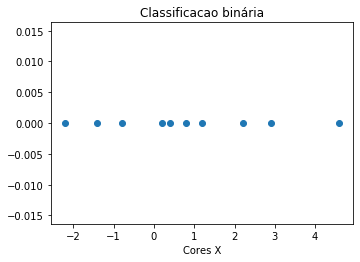

In [28]:
fig = plt.figure()
axis = fig.add_axes([0.1,0.1,0.7,0.7])
axis.set_xlabel('Cores X')
axis.set_title('Classificacao binária')
plt.scatter(x, Y)

O problema é simples: dado os pontos preciso classificar se eles são vermelhos ou verdes


<img src='pontos_classificacao_cores.png' />

Podemos então, fazer a seguinte pergunta: qual é a probabilidade do ponto ser verde, 1.0 o ponto será verde e 0.0 o ponto será vermelho.

Assim, pontos verdes pertencem à classe positiva (SIM, eles são verdes), ao passo que pontos vermelhos pertencem à classe negativa (NÃO, eles não são verdes).

Se treinarmos um modelos para classificar esses pontos, ele verá qual é a probabilidade de cada ponto ser verde. <b>Dado que já sabemos as verdadeiras cores como podemos avaliar se a probabilidade das previsões são boas ou ruins? Esse é o papel da função de custo</b>

No caso de uma <b>classificação binária</b>, a função de custo típica é a <b>binary cross entropy ou log loss</b>


## Função de custo

Essa é a fórmula para a função de custo com dois rótulos

<img src='formula_log_loss.png' />

Onde y é o rótulo (1 para verde e 0 para os pontos vermelhor) e p(y) é a probabilidade do ponto ser verde para todos os N pontos.

Pela fórmula verificamos que para cada ponto verde(y =1), o custo é acresido do log(p(y)) ou seja o <b>logarítimo da probabilidade dele ser verde</b>, de forma similar, para cada ponto vermelho (y=0), o custo é acrescido do valor log(1-p(y)), ou seja o logarítimo da probabilidade dele ser vermelho ou não ser verde

entao chegamos a um ponto em que nos perguntas, o que a entropia tem a ver com isso? 
e porque motivo usamos o logarítimo das probabilidades?

Então vamos calcular o custo visualmente.

<img src='custo_1.png' />

e agora vamos treinar o nosso modelo de Regressão Logística para classificar os nossos pontos. A curva dessa regressão é uma gera pela função sigmóide e <b>representa a probabilidade de um ponto ser verde, dado um atributo X:</b>

<img src='custo_2.png' />

Para os pontos que pertencem a classe positiva (verde), quais são as probabilidades previstas pelo nosso classificador? Essas são as barras verdes abaixo da curva sigmóide, posicionada sobre o atributo X de cada ponto

Ótimo! e os pontos da classe negativa? Seriam as barras vermelhas da curva sigmóide.

<img src='custo_3.png' />

Juntando os 2 ficaria dessa forma:

<img src='custo_4.png' />

Como só precisamos das probabilidades, podemos descartar o eixo y. Ficaria da seguinte forma:

<img src='custo_5.png' />

reposicionando as barras ficariam da seguinte forma:

<img src='custo_6.png' />

Nosso objetivo é calcular o custo, então temos que penalizar previsões ruins. <b>Se a probabilidade associada a verdeira classe é 1, então o custo deve ser 0</b>, de forma análoga, <b>se a probabilidade for baixa, tipo 0.01, o custo retornado deve ser alto.</b>

Coincidentemente, o (negativo do ) logaritimo da probabilidade é bastante adequado para esse objetivo (já que o loagrítimo entre os valores entre 0 e 1 é negativo), usamos o negativo do logaritimo para que os valores sejam positivos.

A figura abaixo ilustra bem isso - conforme a <b>probabilidade prevista para a verdadeira classe se aproxima de zero, o custo aumenta exponencialmente</b>

<img src='custo_7.png' />

Agora vamos calcular o (negativo do) logaritmo das probabilidades — o custo associado a cada um dos pontos.
Finalmente, calculamos a média de todos os custos.


<img src='custo_8.png' />

Feito! Conseguimos calcular o custo dado pela função “binary cross-entropy” ou “log loss” do nosso exemplo básico. O resultado é 0.3329!

Então podemos dizer o log loss ou a entropia cruzada binária é a média do logarítimo da probabilidade do ponto ser verde!


In [1]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

## preciso pesquisar os diferentes tipos de solver para a regressão logística
logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)

print('x = {}'.format(x))
print('y = {}'.format(y))
print('p(y) = {}'.format(np.round(y_pred, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

x = [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y = [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss / Cross Entropy = 0.3329


O parâmetro solve na classe de Regressão Logística é usado para regularização

O 'newton-cg', 'sag' e 'lbfgs' solvers supuporta apenas regularização R2 com fomulação 

se usa um esquema de treino um-vs-resto(QvR) e tem a opção mult_class setada como 'ovr', usa a perda de entropia cruzada é setada como multinomial

Essa classe implementa regressão logistíca regularida usando a biblioteca 'libnear', 'newton-cg', 
'sag', 'lbfg', Note que a regularização é aplicada por padrão. Ela pode tratar a entrada de densidade e escasses. Usa arrays C-ordenados ou matrizes CSR contando float de 64-bits para performace otimizada. 

O 'newton-cg', 'sag' e 'lbfgs' solvers supuporta apenas regularização R2 com fomulação 

Para datasets pequenos, 'liblinear' é uma boa opção enquanto que 'sag' e 'saga' são mais rápidas para os datasets grandes


solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

Para problemas de multiclasse usamos apenas ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ tratando perda multinomial é limitado.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ trata regularização R2 ou sem penalidade

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'


## Sumário